In [19]:
pred_log = []

with open("Log1ForReal.txt", "r") as f:
    for line in f.readlines():
        if("Prediction" in line):
            pred_log.append(line)

lights1 = map(lambda x: x.split("Light 1: ")[1].split(" -")[0], pred_log)
lights2 = map(lambda x: x.split("Light 2: ")[1].split(" -")[0], pred_log)
energy = map(lambda x: x.split("Energy Consumption: ")[1].split(" -")[0], pred_log)
time = list(map(lambda x: int(x.split("Time: ")[1].split("\n")[0]), pred_log))

def divide(a):
    return float(a[0]) / float(a[1])

lights1 = list(map(lambda x: divide(x.split("/")), lights1))
lights2 = list(map(lambda x: divide(x.split("/")), lights2))
energy = list(map(lambda x: divide(x.split("/")), energy))

print(pred_log[0])
print(lights1[0])
print(lights2[0])
print(energy[0])
print(time[0])

03:23.140	ID:1	Prediction: Light 1: 1676774/10000 - Light 2: 1089032/10000 - Energy Consumption: 215725/10000 - Time: 100

167.6774
108.9032
21.5725
100


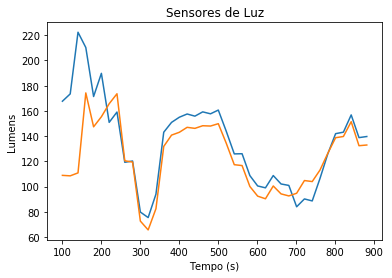

In [20]:
import matplotlib.pyplot as plt

plt.plot(time, lights1)
plt.plot(time, lights2)
plt.title("Sensores de Luz")
plt.ylabel("Lumens")
plt.xlabel("Tempo (s)")
plt.show()

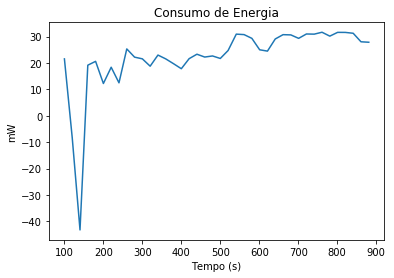

In [21]:
plt.plot(time, energy)
plt.title("Consumo de Energia")
plt.ylabel("mW")
plt.xlabel("Tempo (s)")
plt.show()

In [22]:
update_log = []

with open("Log1ForReal.txt", "r") as f:
    for line in f.readlines():
        if("Model Updated - " in line):
            update_log.append(line)        
            
def divide(a):
    return float(a[0]) / float(a[1])     

def getLogPart(start, end):
    return list(map(lambda x: x.split(start)[1].split(end)[0], update_log))

def getDataTypeFromLogPart(logpart, terminalChar = " -"):
    data = {
        "lights1": list(map(lambda x: x.split("Light 1: ")[1].split(" -")[0], logpart)),
        "lights2": list(map(lambda x: x.split("Light 2: ")[1].split(" -")[0], logpart)),
        "energy": list(map(lambda x: x.split("Energy Consumption: ")[1].split(terminalChar)[0], logpart))
    }
    data = {
        "lights1": list(map(lambda x: divide(x.split("/")), data["lights1"])),
        "lights2": list(map(lambda x: divide(x.split("/")), data["lights2"])),
        "energy": list(map(lambda x: divide(x.split("/")), data["energy"]))
    }
    return data

def createMinQuadList(x, a, b):
    minQuad = {
        "lights1": list(),
        "lights2": list(),
        "energy": list()
    }
    for i in range(len(x)):
        minQuad["lights1"].append(x[i]*a["lights1"][i]+b["lights1"][i])
        minQuad["lights2"].append(x[i]*a["lights2"][i]+b["lights2"][i])
        minQuad["energy"].append(x[i]*a["energy"][i]+b["energy"][i])
    return minQuad
        
            
update_avg_data = getDataTypeFromLogPart(getLogPart("Model Updated - Average: ", " - Time: "))
timeUpdate = list(map(lambda x: divide(x.split("/")), getLogPart(" - Time: ", " - a: ")))
min_quad_a_avg_data = getDataTypeFromLogPart(getLogPart(" - a: ", " - b: "))
min_quad_b_avg_data = getDataTypeFromLogPart(getLogPart(" - b: ", " - aKG: "))
min_quad_avg_data = createMinQuadList(timeUpdate, min_quad_a_avg_data, min_quad_b_avg_data)
min_quad_aKG_avg_data = getDataTypeFromLogPart(getLogPart(" - aKG: ", " - bKG: "))
min_quad_bKG_avg_data = getDataTypeFromLogPart(getLogPart(" - bKG: ", "\n"), "\n")
min_quad_KG_avg_data = createMinQuadList(timeUpdate, min_quad_aKG_avg_data, min_quad_bKG_avg_data)

print(update_log[0])

01:51.250	ID:1	Model Updated - Average: Light 1: 0/10000 - Light 2: 1000000/10000 - Energy Consumption: 1087500/10000 - Time: 540000/10000 - a: Light 1: 0/10000 - Light 2: 0/10000 - Energy Consumption: 0/10000 - b: Light 1: 0/10000 - Light 2: 1000000/10000 - Energy Consumption: 1087500/10000 - aKG: Light 1: 0/10000 - Light 2: 0/10000 - Energy Consumption: 0/10000 - bKG: Light 1: 0/10000 - Light 2: 1000000/10000 - Energy Consumption: 1087500/10000



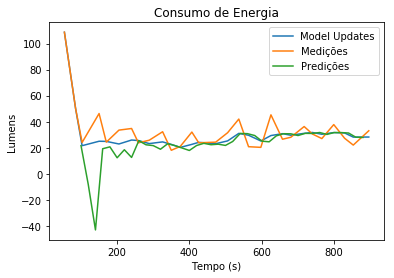

In [26]:
plt.plot(timeUpdate, min_quad_KG_avg_data["energy"], label = "Model Updates")
plt.plot(timeUpdate, update_avg_data["energy"], label = "Medições")
plt.plot(time, energy, label = "Predições")
plt.title("Consumo de Energia (mV)")
plt.ylabel("Lumens")
plt.xlabel("Tempo (s)")
plt.legend()
plt.show()

(40, 40)
(40, 40)
(40, 40)


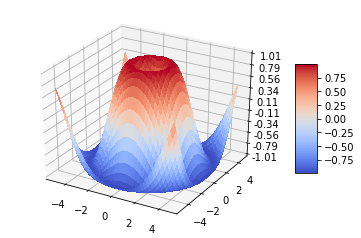

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print(Z.shape)
print(X.shape)
print(Y.shape)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
